In [149]:
%matplotlib notebook


In [155]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [156]:
noaa_data = "data/storm_data_search_results.csv"
noaa = pd.read_csv(noaa_data)

noaa_df = pd.DataFrame(noaa)
noaa_df

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,10075745,ROCKINGHAM CO.,,03/05/1955,1430,Hail,0.75,,0,0,...,,03/05/1955,1430,36.50,-79.68,,,NaN,NaN,1
1,10075746,DURHAM CO.,,03/05/1955,1615,Hail,1.50,,0,0,...,,03/05/1955,1615,36.20,-78.78,,,NaN,NaN,2
2,10075747,MECKLENBURG CO.,,03/12/1955,120,Hail,1.00,,0,0,...,,03/12/1955,120,35.20,-80.90,,,NaN,NaN,3
3,10075748,MECKLENBURG CO.,,03/12/1955,1602,Hail,0.75,,0,0,...,,03/12/1955,1602,35.28,-80.90,,,NaN,NaN,4
4,10075751,CO.,,04/06/1955,2100,Hail,1.00,,0,0,...,,04/06/1955,2100,35.08,-81.08,,,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10089040,FORSYTH CO.,,06/05/1985,1550,Hail,0.75,,0,0,...,,06/05/1985,1550,36.10,-80.25,,,NaN,NaN,496
496,10089042,GUILFORD CO.,,06/05/1985,1555,Hail,1.25,,0,0,...,,06/05/1985,1555,36.07,-79.80,,,NaN,NaN,497
497,10089044,CATAWBA CO.,,06/05/1985,1619,Hail,1.00,,0,0,...,,06/05/1985,1619,35.70,-81.22,,,NaN,NaN,498
498,10089046,IREDELL CO.,,06/05/1985,1630,Hail,0.75,,0,0,...,,06/05/1985,1630,35.78,-80.90,,,NaN,NaN,499


In [157]:
noaa_renamed_df = noaa_df.rename(columns={"CZ_NAME_STR": "Affected County",
                                          "MAGNITUDE": "Diameter(inches)"})
noaa_renamed_df

,EVENT_ID,Affected County,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,Diameter(inches),TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,10075745,ROCKINGHAM CO.,,03/05/1955,1430,Hail,0.75,,0,0,...,,03/05/1955,1430,36.50,-79.68,,,NaN,NaN,1
1,10075746,DURHAM CO.,,03/05/1955,1615,Hail,1.50,,0,0,...,,03/05/1955,1615,36.20,-78.78,,,NaN,NaN,2
2,10075747,MECKLENBURG CO.,,03/12/1955,120,Hail,1.00,,0,0,...,,03/12/1955,120,35.20,-80.90,,,NaN,NaN,3
3,10075748,MECKLENBURG CO.,,03/12/1955,1602,Hail,0.75,,0,0,...,,03/12/1955,1602,35.28,-80.90,,,NaN,NaN,4
4,10075751,CO.,,04/06/1955,2100,Hail,1.00,,0,0,...,,04/06/1955,2100,35.08,-81.08,,,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10089040,FORSYTH CO.,,06/05/1985,1550,Hail,0.75,,0,0,...,,06/05/1985,1550,36.10,-80.25,,,NaN,NaN,496
496,10089042,GUILFORD CO.,,06/05/1985,1555,Hail,1.25,,0,0,...,,06/05/1985,1555,36.07,-79.80,,,NaN,NaN,497
497,10089044,CATAWBA CO.,,06/05/1985,1619,Hail,1.00,,0,0,...,,06/05/1985,1619,35.70,-81.22,,,NaN,NaN,498
498,10089046,IREDELL CO.,,06/05/1985,1630,Hail,0.75,,0,0,...,,06/05/1985,1630,35.78,-80.90,,,NaN,NaN,499


In [178]:
nc_hail_df = noaa_renamed_df[["Affected County", "BEGIN_DATE", "EVENT_TYPE", "Diameter(inches)"]]
nc_hail_df.head()

,Affected County,BEGIN_DATE,EVENT_TYPE,Diameter(inches)
0,ROCKINGHAM CO.,03/05/1955,Hail,0.75
1,DURHAM CO.,03/05/1955,Hail,1.50
2,MECKLENBURG CO.,03/12/1955,Hail,1.00
3,MECKLENBURG CO.,03/12/1955,Hail,0.75
4,CO.,04/06/1955,Hail,1.00


In [184]:
nc_hail_df.count()

Affected County     500
BEGIN_DATE          500
EVENT_TYPE          500
Diameter(inches)    500
dtype: int64

In [185]:
no_null_hail_df = nc_hail_df.dropna(how='any')

In [186]:
no_null_hail_df.count()

Affected County     500
BEGIN_DATE          500
EVENT_TYPE          500
Diameter(inches)    500
dtype: int64

In [187]:
no_null_hail_df["Diameter(inches)"].value_counts()

1.75    150
0.75    148
1.00    110
1.50     24
2.00     23
2.75     14
1.25      9
0.88      7
2.50      7
3.00      3
3.50      2
0.00      2
4.50      1
Name: Diameter(inches), dtype: int64

In [188]:
no_null_hail_df["Affected County"].value_counts()

MECKLENBURG CO.    24
CUMBERLAND CO.     21
WAKE CO.           20
SAMPSON CO.        15
COLUMBUS CO.       14
                   ..
ALEXANDER CO.       1
PERQUIMANS CO.      1
YANCEY CO.          1
GRAHAM CO.          1
HALIFAX CO.         1
Name: Affected County, Length: 88, dtype: int64

In [194]:
no_null_hail_df["BEGIN_DATE"].value_counts()

06/04/1985    21
04/14/1984    19
04/16/1985    19
03/24/1985    16
05/22/1985    14
              ..
07/17/1982     1
04/28/1959     1
05/18/1976     1
05/12/1971     1
05/20/1973     1
Name: BEGIN_DATE, Length: 214, dtype: int64

In [189]:
hail_mean = no_null_hail_df.groupby('Affected County').mean()["Diameter(inches)"]
hail_mean

hail_median = no_null_hail_df.groupby('Affected County').median()["Diameter(inches)"]
hail_median

hail_variance = no_null_hail_df.groupby('Affected County').var()["Diameter(inches)"]
hail_variance

hail_std = no_null_hail_df.groupby('Affected County').std()["Diameter(inches)"]
hail_std

hail_sem = no_null_hail_df.groupby('Affected County').sem()["Diameter(inches)"]
hail_sem



Affected County
ALAMANCE CO.     0.190029
ALEXANDER CO.         NaN
ANSON CO.        0.125000
AVERY CO.        0.375000
BEAUFORT CO.     0.250000
                   ...   
WAYNE CO.        0.158333
WILKES CO.       0.187500
WILSON CO.       0.125000
YADKIN CO.       0.176777
YANCEY CO.            NaN
Name: Diameter(inches), Length: 88, dtype: float64

In [190]:
meck_df = no_null_hail_df.loc[nc_hail_df["Diameter(inches)"] == "MECKLENBURG CO.",:]
cumber_df = no_null_hail_df.loc[nc_hail_df["Diameter(inches)"] == "CUMBERLAND CO.", :]
wake_df = no_null_hail_df.loc[nc_hail_df["Diameter(inches)"] == "WAKE CO.", :]
sampson_df = no_null_hail_df.loc[nc_hail_df["Diameter(inches)"] == "SAMPSON CO.", :]

meck_size = meck_df.groupby('Affected County').max()['BEGIN_DATE']
meck_hail = pd.DataFrame(meck_size)

cumber_size = cumber_df.groupby('Affected County').max()['BEGIN_DATE']
cumber_hail = pd.DataFrame(cumber_size)

wake_size = wake_df.groupby('Affected County').max()['BEGIN_DATE']
wake_hail = pd.DataFrame(wake_size)

sampson_size = sampson_df.groupby('Affected County').max()['BEGIN_DATE']
sampson_hail = pd.DataFrame(sampson_size)

In [191]:
meck_merge = pd.merge(meck_size, no_null_hail_df, on=("Affected County","BEGIN_DATE"),how="left")
meck_merge

,Affected County,BEGIN_DATE,EVENT_TYPE,Diameter(inches)


In [192]:
forline_df = wake_df.loc[wake_df["Affected County"] == "WAKE CO.",:]
forline_df

,Affected County,BEGIN_DATE,EVENT_TYPE,Diameter(inches)


<IPython.core.display.Javascript object>


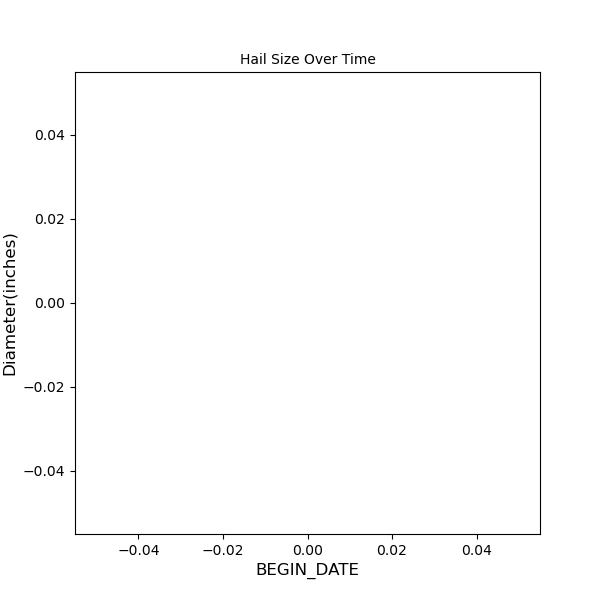

Text(0, 0.5, 'Diameter(inches)')

In [193]:
x_axis = forline_df["BEGIN_DATE"]
hail_siz = forline_df["Diameter(inches)"]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title("Hail Size Over Time",fontsize =10)
plt.plot(x_axis, hail_siz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('BEGIN_DATE',fontsize =12)
plt.ylabel('Diameter(inches)',fontsize =12)